In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt




%matplotlib notebook

# Load Dataset

In [11]:
# Deutsche uni

# Dataset Information
# 
# Frame rate: 16 FPS
#
# Person id | frame | x pos | y pos | z pos

FPS = 16

BG = "UG/ug.png"

PATH_1 = "UG/UG-roh_nachkorrigiert/ug-100-007.txt"


<IPython.core.display.Javascript object>


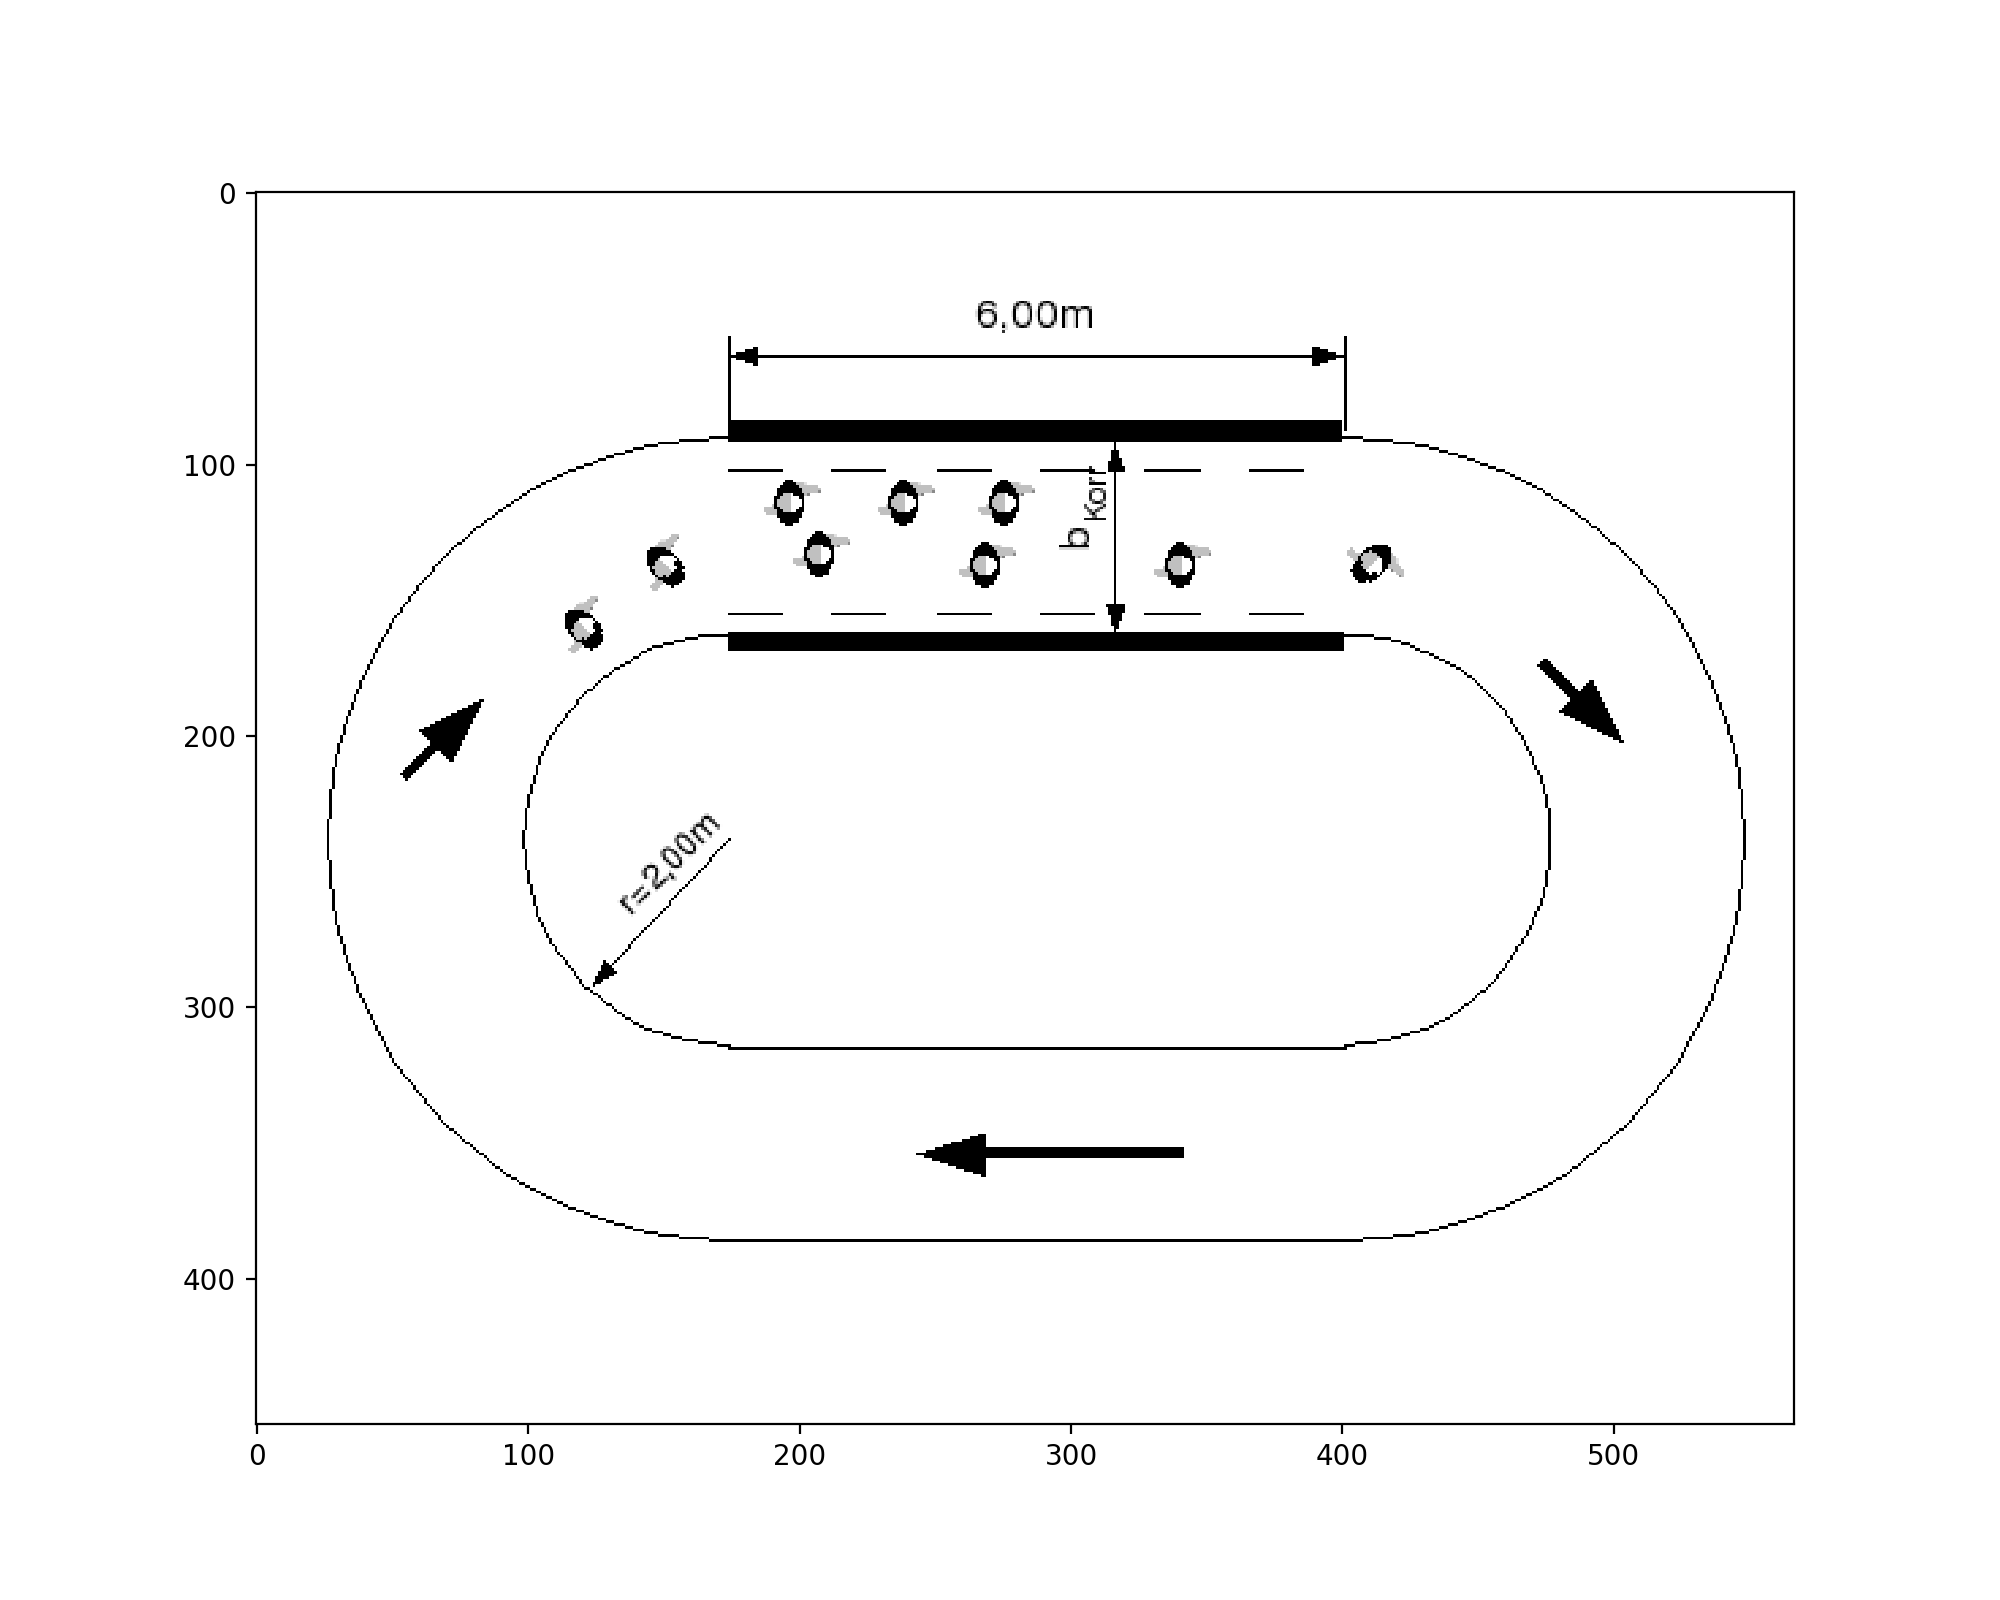

In [12]:
img = plt.imread(BG)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

In [13]:
 
class DataLoader():
    def __init__(self, path, x_o=0, y_o=0):
        self.path = path
        self.x_offset = x_o
        self.y_offset = y_o
        with open(path) as f:
            df = pd.DataFrame(columns=['p', 'f', 'x', 'y', 'z'] )
            for line in f:
                data = [float(d) for d in line.strip().split()]
                df = df.append( dict( zip(df.columns, data) ), ignore_index=True )
                
        self.data = df 
        
    
    def person(self, id):
        self.temp = self.data[self.data['p'] == id]
        
        l = len(self.temp)
        cor = np.vstack((np.ones(l)*-1, np.ones(l))).T
        offset = np.vstack((np.ones(l)*self.x_offset, np.ones(l)*self.y_offset)).T
        return self.temp['f'].to_numpy(), self.temp[['y', 'x']].to_numpy() * cor+offset
    
    
    def frame(self, id):
        self.temp = self.data[self.data['f'] == id]
        l = len(self.temp)
        cor = np.vstack((np.ones(l)*-1, np.ones(l))).T
        offset = np.vstack((np.ones(l)*self.x_offset, np.ones(l)*self.y_offset)).T
        return self.temp['p'].to_numpy(), self.temp[['y', 'x']].to_numpy() * cor+offset
    

In [14]:
loader_1 = DataLoader(PATH_1)

In [15]:
#loader_2 = DataLoader(PATH_2, x_o = 0)

<IPython.core.display.Javascript object>


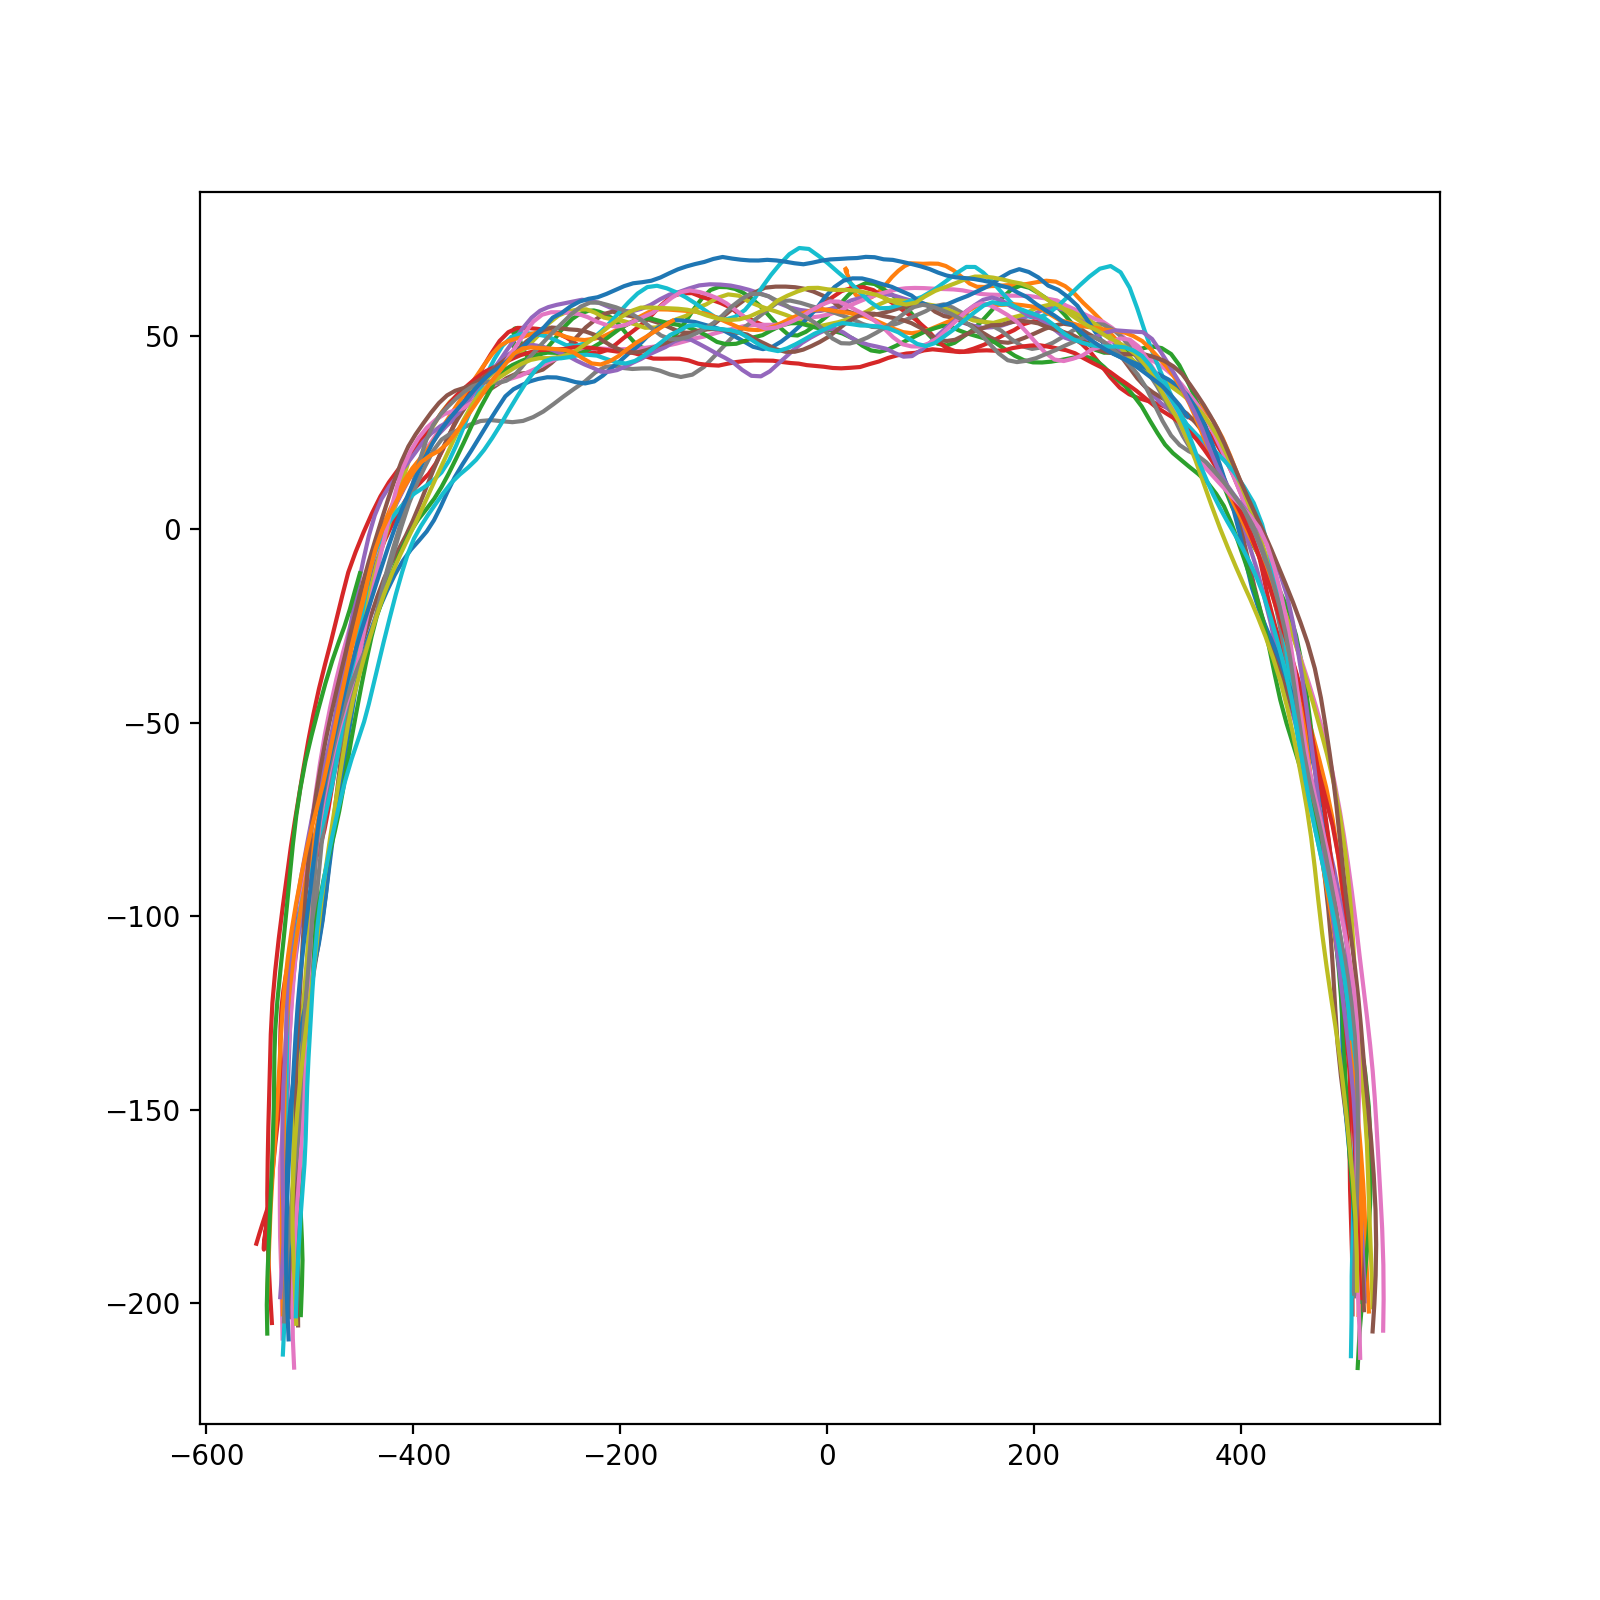

In [16]:
plt.figure(figsize=(8, 8))


for id in range(45):

    time, traj = loader_1.person(id)
    plt.plot(traj[:, 0], traj[:, 1])

    #time2, traj2 = loader_2.person(id)
    #plt.plot(traj2[:, 0], traj2[:, 1], ls="--")

    #print(time)
    #print(time2)



#plt.xlim([-300, 300])
#plt.ylim([0, 100])
plt.show()